In [1]:
import re
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [15]:
data = pd.read_csv("C:\\Users\\hun98\\data_mining\\result\\novotel\\novotel_tokens.csv")

In [16]:
data.dropna(subset=['0'],inplace=True)

In [17]:
tokens=data.values.tolist()
fill_tokens=[]
for token in tokens:
    token=[word for word in token if pd.isnull(word) == False ]
    fill_tokens.append(token)

[['직원', '친절', '건물', '전체', '컨디션'],
 ['시내'],
 ['와이파이', '정보', '불편'],
 ['호텔', '연방'],
 ['냄새', '공기', '청정기', '비치'],
 ['객실', '청결', '장점', '직원', '대답', '질문', '불친절', '직원'],
 ['가격', '시설', '만족', '불편'],
 ['뮤지컬', '숙박', '건데', '위치', '요건'],
 ['만족', '숙박', '편안', '숙소', '휴가철', '평소', '식사', '시간', '휴가철', '이해'],
 ['체크인', '시간', '사람', '서서', '웰컴', '드링크', '제공', '객실', '싱크대', '역류', '오염물', '조식'],
 ['직원', '친절', '기억', '호텔', '부대시설', '서비스', '최고', '다음', '기회', '방문', '의사'],
 ['친절',
  '이용',
  '뷔페식당',
  '전화',
  '예약',
  '프런트',
  '남자',
  '불친절',
  '친절',
  '이상',
  '정도',
  '불친절',
  '그분',
  '친절',
  '객실',
  '컨디션',
  '만족'],
 ['도심', '여행지', '호텔'],
 ['에어컨', '온도', '이불'],
 ['대중교통',
  '이용',
  '위치',
  '컨디션',
  '평이',
  '침대',
  '화장실',
  '구조',
  '침대',
  '화장실',
  '방향',
  '현관',
  '냉장고',
  '세탁기',
  '싱크대',
  '최적',
  '수영장',
  '평일',
  '이용',
  '사진',
  '야외',
  '수영장',
  '수영',
  '사진',
  '용도',
  '존재'],
 ['모기'],
 ['직원', '친절'],
 ['여름', '수영장', '이용', '시간', '웨딩', '이용', '시간', '제한'],
 ['청결',
  '직원',
  '친절',
  '무엇',
  '화장실',
  '공간',
  '가족',
  '여행',
  '레지',
  '던스',

# 명사 token을 가지고 count 기반 시각화하기

In [18]:
word_cloud_tokens = sum(fill_tokens,[])
len(word_cloud_tokens)

35638

In [19]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

In [20]:
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\H2HDRM.TTF").get_name()
rc("font",family=font_name)

In [21]:
const_cnt={}
for word in word_cloud_tokens:
    const_cnt[word] = const_cnt.get(word,0)+1

In [28]:
def word_graph(cnt, max_words=10):
    
    sorted_w = sorted(cnt.items(), key=lambda kv: kv[1])
    print(sorted_w[-max_words:])
    n,w=zip(*sorted_w[-max_words:])
    n = list(n)
    n.insert(0,'로봇')
    w = list(w)
    w.insert(0,cnt['로봇'])
    n = list(n)
    n.insert(1,'지니')
    w = list(w)
    w.insert(1,cnt['지니'])
    
    plt.figure(figsize=(20,10),facecolor='white')
    plt.rc('font', size=20)
    plt.barh(range(len(n)),w,tick_label=n,color='dodgerblue')
    plt.barh(0,32,color='#e35f62')
    plt.barh(1,174,color='#e35f62')

    for i, v in enumerate(w):
        plt.text(v, range(len(n))[i], w[i],   # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
                 fontsize = 15, 
                 color='black',
                 horizontalalignment='left',  # horizontalalignment (left, center, right)
                 verticalalignment='center')  

    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.title('Word count graph', size=30)
    plt.savefig("novotel_cnt.png")
    plt.show()

[('생각', 260), ('침대', 261), ('최고', 271), ('루프', 322), ('서비스', 341), ('사람', 347), ('예약', 358), ('체크인', 364), ('다음', 377), ('시간', 393), ('방문', 426), ('시설', 469), ('조식', 545), ('만족', 602), ('객실', 636), ('직원', 762), ('호텔', 765), ('친절', 946), ('이용', 1169), ('수영장', 1393)]


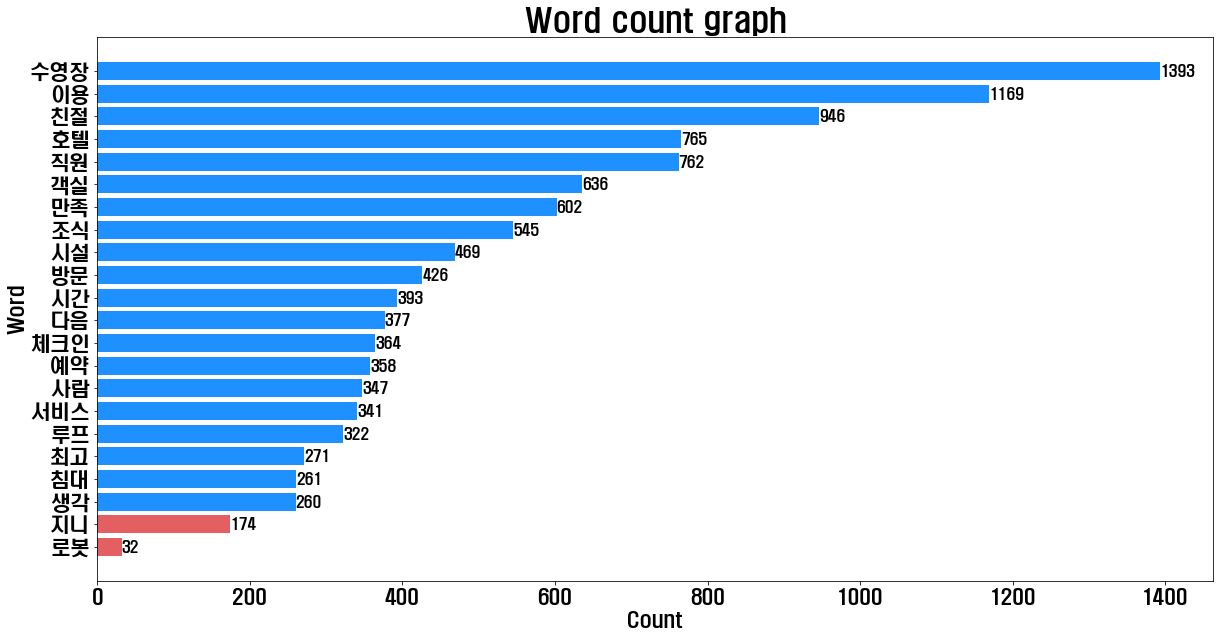

In [29]:
word_graph(const_cnt, 20)

In [287]:
from wordcloud import WordCloud

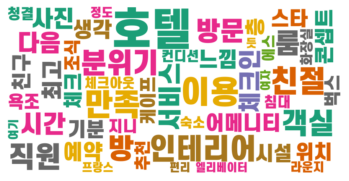

In [288]:
wordcloud = WordCloud(font_path="C:\\Users\\hun98\\AppData\\Local\\Microsoft\\Windows\\Fonts\\SCDream9.otf",
                      background_color='white', colormap = 'Dark2', max_font_size=100, width=800,
                      height=400,max_words=50)
wordcloud.generate_from_frequencies(const_cnt)

# wordcloud.to_file("lescape_wordcloud.png")

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [237]:
const_cnt['지니']

108